In [42]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import tarfile
import os
import cv2

In [43]:
# Load the model
model = tf.keras.models.load_model('./my_model.h5')

In [44]:
# Verify the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 5, 5, 512)         295424    
                                                                 
 average_pooling2d_1 (Averag  (None, 2, 2, 512)       

# manually test

In [45]:
x, y = [], []
sample_num = len(os.listdir('./../hwnumbers/'))

In [46]:
for i in os.listdir('./../hwnumbers/'):
    data = plt.imread(f'./../hwnumbers/{i}')
    data = cv2.cvtColor(data, cv2.COLOR_RGB2GRAY)
    _, data = cv2.threshold(data, 180, 255, cv2.THRESH_BINARY_INV)
    data = cv2.resize(data, (28, 28), interpolation=cv2.INTER_AREA)
    x.append(np.array(data))
    y.append(i.split(sep='.')[0])

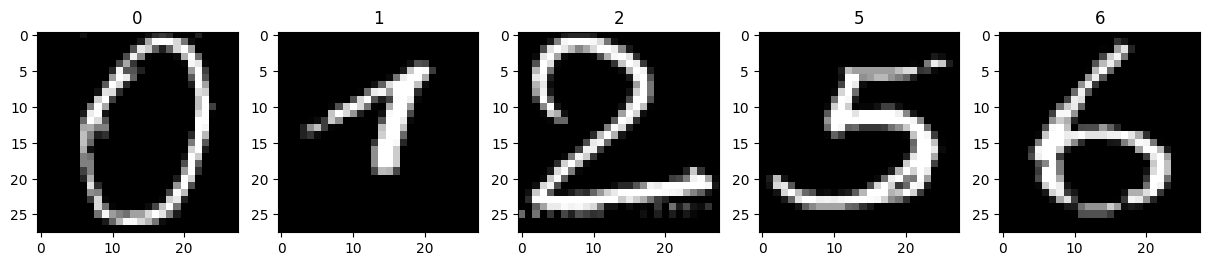

In [47]:
fig, ax = plt.subplots(1, sample_num, figsize=(15,15))
ax = ax.flatten()
for i in range(sample_num):
    ax[i].imshow(x[i], cmap='gray')
    ax[i].title.set_text(y[i])

In [48]:
for i in range(sample_num):
    print(f'Model Prediction : {np.argmax(model.predict(x[i].reshape(-1, 28, 28, 1)))}\nActual Label : {y[i]}')

1/1 [==============================] - 4s 4s/step
Model Prediction : 0
Actual Label : 0
1/1 [==============================] - 0s 20ms/step
Model Prediction : 3
Actual Label : 1
1/1 [==============================] - 0s 19ms/step
Model Prediction : 2
Actual Label : 2
1/1 [==============================] - 0s 20ms/step
Model Prediction : 5
Actual Label : 5
1/1 [==============================] - 0s 21ms/step
Model Prediction : 6
Actual Label : 6
